<a href="https://colab.research.google.com/github/KirillSmirnov2/InnopolisStudentPublicRepository/blob/main/HW8_SmirnovKK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание №8






Использовать любой датасет с численными и категориальными данными, с количеством строк больше 30.
Выполнить задания:

1. Выполнить предобработку данных (найти и обработать пропуски, дубликаты и выбросы).

2. Проверить все численные данные на нормальность по известным критериям.

3. Сделать зависимые (произвольное разделение) и независимые (с помощью фильтров) выборки по нескольким столбцам.

4. Выполнить сравнение выборок с помощью теста Стьюдента или тестов Манна-Уитни, Уилкоксона, Пирсона.


---
Задача 1
 Выполнить предобработку данных (найти и обработать пропуски, дубликаты и выбросы).


---

In [70]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import filterfalse
from sklearn.linear_model import LinearRegression
import random



In [71]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [72]:
df['bmi']
df.isnull().describe()
df.loc[df.duplicated() == True]
df.loc[df.duplicated(subset =['id']) == True]
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [73]:
print('gender data: ',set(df['gender'].tolist()))
print('marriage data(ever_married): ',set(df['ever_married'].tolist()))
print('work_type data: ',set(df['work_type'].tolist()))
print('Residence_type: ',set(df['Residence_type'].tolist()))
print('smoking_status data: ',set(df['smoking_status'].tolist()))
df2=df.loc[df.isna()['bmi'] == False]
print('убраны пропущенные bmi',len(df2))


gender data:  {'Female', 'Male', 'Other'}
marriage data(ever_married):  {'Yes', 'No'}
work_type data:  {'Self-employed', 'Govt_job', 'children', 'Private', 'Never_worked'}
Residence_type:  {'Urban', 'Rural'}
smoking_status data:  {'Unknown', 'smokes', 'never smoked', 'formerly smoked'}
убраны пропущенные bmi 4909


== ==================================================== == ==========================================

Задача 2   Проверить все численные данные на нормальность по известным критериям.


== ==================================================== == ==========================================

In [74]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Проверим нормальностьраспределения возрастов , индексов массы тела и уровня глюкозы

In [226]:
import scipy.stats
# проверка норм распред
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import kstest
# проверка ненорм распред
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
# сравнение категориальных выборок
from scipy.stats import chi2_contingency

In [76]:
arr_G_age=np.array(df2['age'].values)
arr_G_AGL=np.array(df2['avg_glucose_level'].values)
arr_G_bmi=np.array(df2['bmi'].values)
print(len(arr_G_age),' : ',arr_G_age)
print(len(arr_G_AGL),' : ',arr_G_AGL)
print(len(arr_G_bmi),' : ',arr_G_bmi)



4909  :  [67. 80. 49. ... 35. 51. 44.]
4909  :  [228.69 105.92 171.23 ...  82.99 166.29  85.28]
4909  :  [36.6 32.5 34.4 ... 30.6 25.6 26.2]


Возраст

mean: 42.865373803218574, st.dev: 22.55281750822711
int_dov(alpha=0.05): (42.84518926696955, 42.8855583394676)


<Axes: ylabel='Count'>

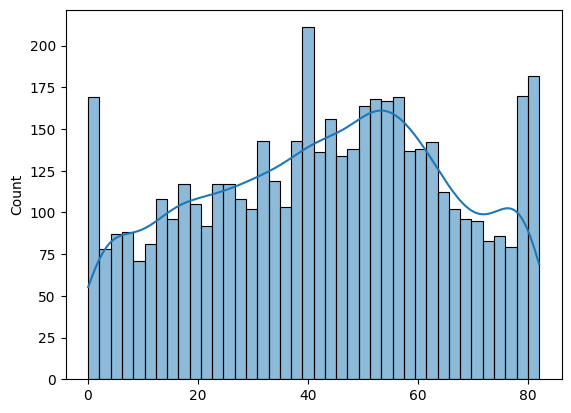

In [92]:
alpha=0.05
arr_G_age_MV=np.mean(arr_G_age)
arr_G_age_std=np.std(arr_G_age)
arr_G_age_scale=arr_G_age_std / np.sqrt(len(df2['age']))
int_dov=scipy.stats.norm.interval(alpha , loc=arr_G_age_MV, scale=arr_G_age_scale)
print(f'mean: {arr_G_age_MV}, st.dev: {arr_G_age_std}')
print(f'int_dov(alpha={alpha}): {int_dov}')
arr_G_age_min=np.min(arr_G_age)
arr_G_age_max=np.max(arr_G_age)
#plt.vlines(arr_G_age,,,,)



In [110]:
# @title Проверка по критериям
def normalnoye(titles ,arra , alpha):
  print('Анализ нормальности распределения по: ', titles)
  statistica_SHW, p_val_SHW = shapiro(arra)
  print('statistica_SHWs', statistica_SHW)
  print('p_val  ',p_val_SHW)
  print(alpha)
  if p_val_SHW>alpha:
    print('По критерию Шапиро-Уилка : Распределение можно приближенно нормальным')
  else:
    print('По критерию Шапиро-Уилка : Данные НЕ подчиняются нормальному распределению')
  print('----------------------------------------------')

  kstest_res=kstest(arra, 'norm', args=(),N=20, alternative='two-sided')
  #print('P-val KStest:',kstest_res[1])
  if kstest_res[1]>alpha:
    print('По критерию Колмогорова-Смирнова : Распределение можно приближенно нормальным')
  else:
    print('По критерию Колмогорова-Смирнова : Данные НЕ подчиняются нормальному распределению')
  print('----------------------------------------------')

  result = anderson(arra)
  alpha = 0.05
  if result.statistic < result.critical_values[2] and all(level > alpha for level in result.significance_level):
    print('По критерию Андерсона-Дарлинга :Распределение можно приближенно нормальным')
  else:
    print('По критерию Андерсона-Дарлинга :Данные НЕ подчиняются нормальному распределению')
  print('----------------------------------------------')


Анализ нормальности распределения по:  Возраст [age]
statistica_SHWs 0.9682105779647827
p_val   1.258497064878765e-31
0.05
По критерию Шапиро-Уилка : Данные НЕ подчиняются нормальному распределению
----------------------------------------------
По критерию Колмогорова-Смирнова : Данные НЕ подчиняются нормальному распределению
----------------------------------------------
По критерию Андерсона-Дарлинга :Данные НЕ подчиняются нормальному распределению
----------------------------------------------


<Axes: ylabel='Count'>

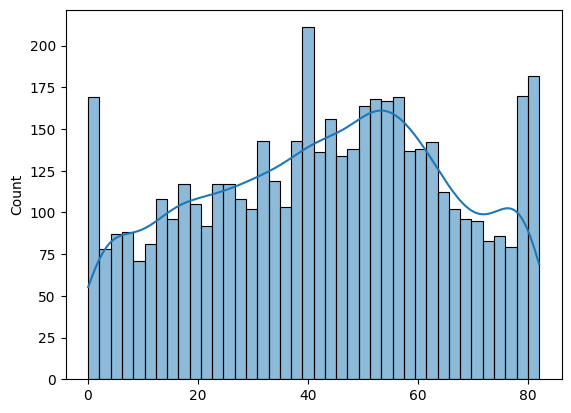

In [113]:
normalnoye('Возраст [age]', arr_G_age, 0.05)
sns.histplot(arr_G_age, bins=40, kde=True)



Анализ нормальности распределения по:  уровень глюкозы [avg_glucose_level]
statistica_SHWs 0.8058329820632935
p_val   0.0
0.05
По критерию Шапиро-Уилка : Данные НЕ подчиняются нормальному распределению
----------------------------------------------
По критерию Колмогорова-Смирнова : Данные НЕ подчиняются нормальному распределению
----------------------------------------------
По критерию Андерсона-Дарлинга :Данные НЕ подчиняются нормальному распределению
----------------------------------------------


<Axes: ylabel='Count'>

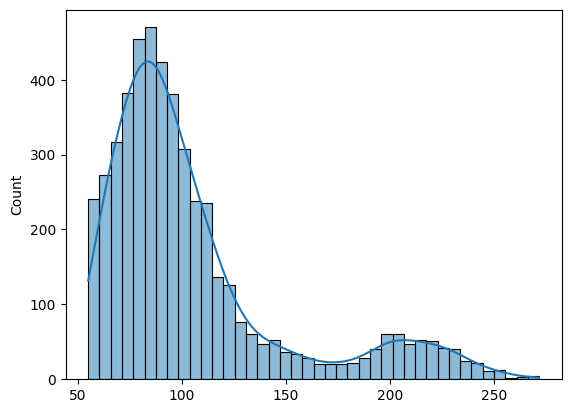

In [114]:
normalnoye('уровень глюкозы [avg_glucose_level]', arr_G_AGL, 0.05)
sns.histplot(arr_G_AGL, bins=40, kde=True)


Анализ нормальности распределения по:  индекс массы тела [bmi]
statistica_SHWs 0.9535489082336426
p_val   6.625949432834918e-37
0.05
По критерию Шапиро-Уилка : Данные НЕ подчиняются нормальному распределению
----------------------------------------------
По критерию Колмогорова-Смирнова : Данные НЕ подчиняются нормальному распределению
----------------------------------------------
По критерию Андерсона-Дарлинга :Данные НЕ подчиняются нормальному распределению
----------------------------------------------


<Axes: ylabel='Count'>

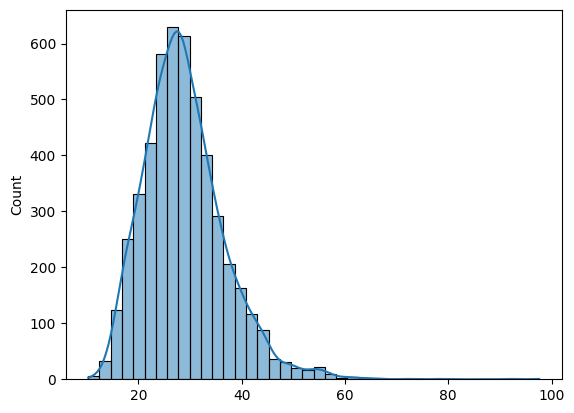

In [115]:
normalnoye('индекс массы тела [bmi]', arr_G_bmi, 0.05)
sns.histplot(arr_G_bmi, bins=40, kde=True)

== ==================================================== == ==========================================

Задача 3 Сделать зависимые (произвольное разделение) и независимые (с помощью фильтров) выборки по нескольким столбцам.

== ==================================================== == ==========================================

In [197]:
nnn=20
Sample_x2=random.sample(range(len(df2['bmi'])), 2*nnn)
print(Sample_x2)
vib_zav_1=[]
vib_zav_2=[]
sw=0
for i in Sample_x2:
  if sw == 0:
    vib_zav_1.append(arr_G_bmi[i])
    sw=1
  else:
    vib_zav_2.append(arr_G_bmi[i])
    sw=0
arr_vib_zav_1=np.array(vib_zav_1)
arr_vib_zav_2=np.array(vib_zav_2)
print('Зависимая(произвольное разделение)выборка 1 ',arr_vib_zav_1)
print('Зависимая(произвольное разделение)выборка 2 ',arr_vib_zav_2)

vib_nezav_1=[]
vib_nezav_2=[]
df3_1=df2['bmi'].loc[df2['Residence_type'] == 'Urban']
df3_2=df2['bmi'].loc[df2['Residence_type'] == 'Rural']
print('-----------------------------------')
#print(df3_1.values, len(df3_1))
Sample2_1=random.sample(range(len(df3_1)), nnn)
Sample2_2=random.sample(range(len(df3_2)), nnn)
#print(Sample2_1)
#print(Sample2_2)
arr_v_bmi_s1=np.array(df3_1.values)
arr_v_bmi_s2=np.array(df3_2.values)
for i in Sample2_1:
  vib_nezav_1.append(arr_v_bmi_s1[i])
for i in Sample2_2:
  vib_nezav_2.append(arr_v_bmi_s2[i])

arr_vib_nezav_1=np.array(vib_nezav_1)
arr_vib_nezav_2=np.array(vib_nezav_2)
print('Независимая (с помощью фильтров) выборка 1',arr_vib_nezav_1)
print('Независимая (с помощью фильтров) выборка 2',arr_vib_nezav_2)
print('-----------------------------------')
MWNZV=scipy.stats.mannwhitneyu(arr_vib_nezav_1,arr_vib_nezav_2)
MWZV=scipy.stats.mannwhitneyu(arr_vib_zav_1,arr_vib_zav_2)
print(f'зав_1 и зав_2  stat: {MWZV[0]} ; p-val:{MWZV[1]}')
print(f'незав_1 и незав_2  stat: {MWNZV[0]} ; p-val:{MWNZV[1]}')
if  MWZV[1]> alpha:
  print('Статистически значимых различий между выборками arr_vib_zav_1 и arr_vib_zav_2  не обнаружено')
else:
  print('Статистически значимые различия между выборками arr_vib_zav_1 и arr_vib_zav_2  есть')
if  MWNZV[1]> alpha:
  print('Статистически значимых различий между выборками arr_vib_nezav_1 и arr_vib_nezav_2  не обнаружено')
else:
  print('Статистически значимые различия между выборками arr_vib_nezav_1 и arr_vib_nezav_2  есть')

[469, 3028, 3058, 672, 3875, 4466, 3302, 4199, 3647, 4731, 3055, 4717, 2790, 1489, 3870, 1598, 1068, 2046, 2295, 4623, 880, 3166, 1621, 3787, 4906, 2825, 3747, 1820, 776, 4839, 4907, 483, 990, 161, 2247, 2179, 3329, 812, 1454, 1492]
Зависимая(произвольное разделение)выборка 1  [39.7 31.6 22.3 24.3 25.  29.3 23.7 35.2 42.2 27.6 22.8 32.  30.6 39.2
 26.4 25.6 29.2 20.4 27.6 32.8]
Зависимая(произвольное разделение)выборка 2  [25.1 23.5 32.3 20.8 24.8 37.2 25.1 44.8 34.3 23.4 13.5 25.4 40.1 30.8
 28.7 28.7 45.5 20.3 38.9 34.4]
-----------------------------------
Независимая (с помощью фильтров) выборка 1 [27.5 23.7 32.8 33.7 26.5 34.5 17.2 38.6 23.  25.1 30.7 35.6 21.7 23.5
 17.5 27.8 19.3 20.6 19.9 26.2]
Независимая (с помощью фильтров) выборка 2 [24.8 34.5 35.7 34.7 35.8 32.6 28.8 24.7 33.3 38.7 28.2 35.8 25.5 30.1
 30.9 30.1 19.8 16.4 29.5 21.5]
-----------------------------------
зав_1 и зав_2  stat: 197.0 ; p-val:0.9460763999037595
незав_1 и незав_2  stat: 135.5 ; p-val:0.083371650668

== ==================================================== == ==========================================

Задача 4 Выполнить сравнение выборок с помощью теста Стьюдента или тестов Манна-Уитни, Уилкоксона, Пирсона.

== ==================================================== == ==========================================

In [202]:
# @title По критерию Манна-Уитни:
MWNZV=scipy.stats.mannwhitneyu(arr_vib_nezav_1,arr_vib_nezav_2)
MWZV=scipy.stats.mannwhitneyu(arr_vib_zav_1,arr_vib_zav_2)
print(f'зав_1 и зав_2  stat: {MWZV[0]} ; p-val:{MWZV[1]}')
print(f'незав_1 и незав_2  stat: {MWNZV[0]} ; p-val:{MWNZV[1]}')
print('По критерию Манна-Уитни:')
if  MWZV[1]> alpha:
  print('Статистически значимых различий между выборками arr_vib_zav_1 и arr_vib_zav_2  не обнаружено')
else:
  print('Статистически значимые различия между выборками arr_vib_zav_1 и arr_vib_zav_2  есть')
if  MWNZV[1]> alpha:
  print('Статистически значимых различий между выборками arr_vib_nezav_1 и arr_vib_nezav_2  не обнаружено')
else:
  print('Статистически значимые различия между выборками arr_vib_nezav_1 и arr_vib_nezav_2  есть')

зав_1 и зав_2  stat: 197.0 ; p-val:0.9460763999037595
незав_1 и незав_2  stat: 135.5 ; p-val:0.08337165066885797
По критерию Манна-Уитни:
Статистически значимых различий между выборками arr_vib_zav_1 и arr_vib_zav_2  не обнаружено
Статистически значимых различий между выборками arr_vib_nezav_1 и arr_vib_nezav_2  не обнаружено


In [203]:
# @title По критерию Уилкоксона:
WNZV=scipy.stats.wilcoxon(arr_vib_nezav_1,arr_vib_nezav_2)
WZV=scipy.stats.wilcoxon(arr_vib_zav_1,arr_vib_zav_2)
print(f'зав_1 и зав_2  stat: {WZV[0]} ; p-val:{WZV[1]}')
print(f'незав_1 и незав_2  stat: {WNZV[0]} ; p-val:{WNZV[1]}')
print('По критерию Уилкоксона:')
if  WZV[1]> alpha:
  print('Статистически значимых различий между выборками arr_vib_zav_1 и arr_vib_zav_2  не обнаружено')
else:
  print('Статистически значимые различия между выборками arr_vib_zav_1 и arr_vib_zav_2  есть')
if  WNZV[1]> alpha:
  print('Статистически значимых различий между выборками arr_vib_nezav_1 и arr_vib_nezav_2  не обнаружено')
else:
  print('Статистически значимые различия между выборками arr_vib_nezav_1 и arr_vib_nezav_2  есть')

зав_1 и зав_2  stat: 96.0 ; p-val:0.7561664581298828
незав_1 и незав_2  stat: 58.0 ; p-val:0.082550048828125
По критерию Уилкоксона:
Статистически значимых различий между выборками arr_vib_zav_1 и arr_vib_zav_2  не обнаружено
Статистически значимых различий между выборками arr_vib_nezav_1 и arr_vib_nezav_2  не обнаружено


In [231]:
df4=df2.loc[df2['stroke'] == 1]
df4=df4.loc[df4['hypertension'] == 1]
df4.drop(['age','id','ever_married','ever_married','work_type','avg_glucose_level','bmi','smoking_status','stroke','hypertension','heart_disease'], axis= 1 , inplace= True )
print(len(df4))
#print(df4)
contingency_table = pd.crosstab(df4['gender'],df4['Residence_type'])
Chi2ContingencyResult=chi2_contingency(contingency_table)
print(Chi2ContingencyResult)
print('p-val= ',Chi2ContingencyResult[1])
if  Chi2ContingencyResult[1]> alpha:
  print('статистически значимая ассоциация (связь) между полом  и местом проживания для людей с зарегистрированным инсультом НЕ обнаружена')
else:
  print('статистически значимая ассоциация (связь) между полом  и местом проживания для людей с зарегистрированным инсультом ЕСТЬ')

60
Chi2ContingencyResult(statistic=0.04148753870667097, pvalue=0.8385997424674978, dof=1, expected_freq=array([[17.88333333, 19.11666667],
       [11.11666667, 11.88333333]]))
p-val=  0.8385997424674978
статистически значимая ассоциация (связь) между полом  и местом проживания для людей с зарегистрированным инсультом НЕ обнаружена


In [ ]:
# @title Текст заголовка по умолчанию
import scipy.stats
from scipy.stats import shapiro
X=df['v50'].values
print(X)
alpha = 0.05
statistica_SHW, p_val = shapiro(X)
print('statistica_SHWs', statistica_SHW)
print('p_val  ',p_val)


from scipy.stats import kstest
kstest_res=kstest(X, 'norm', args=(),N=30, alternative='two-sided')

print(kstest_res)

from scipy.stats import anderson
result = anderson(X)
alpha = 0.05
if result.statistic < result.critical_values[2] and all(level > alpha for level in result.significance_level):
  print('Распределение можно приближенно нормальным')
else:
  print('Данные не подчиняются нормальному распределению')
#print(result)
from scipy import stats
sample1=np.array([85, 91, 78, 76, 96, 88, 94, 82, 92, 85])
mean_value=85
t_statistic, p_value = scipy.stats.ttest_1samp(sample1,mean_value)
print(t_statistic)
print(p_value)
print( scipy.stats.ttest_1samp(sample1,mean_value))
print('-----------------------------------------')
sample2=np.array([75,68,82,62,55,78,88,71,77,80])
t_statistic, p_value = scipy.stats.ttest_ind(sample1, sample2)
print(t_statistic)
print(p_value)
print(  scipy.stats.ttest_ind(sample1, sample2))




In [ ]:
# @title Текст заголовка по умолчанию
gr1=np.array([68,72,65,74,70])
gr2=np.array([75,78,82,80,77])
gr3=np.array([62,58,63,65,60])
f_stat,p_lval=stats.f_oneway(gr1,gr2,gr3)
print('gr1', np.mean(gr1))
print('gr2', np.mean(gr2))
print('gr3', np.mean(gr3))
print(f_stat)
print(p_lval)

In [43]:
# @title Текст заголовка по умолчанию
from scipy.stats import mannwhitneyu

grs1=np.array([12,15,18,21,23,24,28,30,32])
grs2=np.array([8,11,14,19,22,25,27,31,35])
scipy.stats.mannwhitneyu(grs1,grs2)
#не можем отвергнуть гипотезу что выборки близки друг к другу

MannwhitneyuResult(statistic=44.0, pvalue=0.7910815129207817)